In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df = df.drop(columns=['Records'])

In [ ]:
le_results = LabelEncoder()
df['Results'] = le_results.fit_transform(df['Results'])

In [ ]:
categorical_columns = [
    'Your friend has invited you to a party. Consider how you might respond in the given scenario. Choose the option that best reflects your feelings and tendencies',
    'You have an upcoming deadline at work. How do you typically handle this',
    'You receive unexpected praise for your achievements. How do you react?',
    'You witness a car accident on the street. How does it affect you?',
    'You are preparing for a social event with friends. How do you approach it?',
    'You find yourself in a crowded and noisy environment. How do you react?',
    'You encounter a trigger related to a past traumatic event. How do you cope?',
    'You are faced with a decision that requires careful consideration. How do you approach it?',
    'You are experiencing a period of heightened creativity and productivity. How does it impact you?',
    'You are in a situation where you feel judged by others. How do you react?'
]

In [ ]:
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
X = df.iloc[:, 1:-1]
y = df['Results']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9990426614013044


In [ ]:
class_report = classification_report(y_test, y_pred, target_names=le_results.classes_)
print("Classification Report:")
print(class_report)

Classification Report:
                                       precision    recall  f1-score   support

                    Anxiety Disorders       1.00      1.00      1.00      2563
                     Bipolar Disorder       1.00      1.00      1.00      1328
                           Depression       1.00      1.00      1.00      3896
                                 None       1.00      1.00      1.00      5124
  Obsessive-Compulsive Disorder (OCD)       1.00      1.00      1.00      1231
Post-Traumatic Stress Disorder (PTSD)       1.00      1.00      1.00      1248
                        Schizophrenia       1.00      1.00      1.00      1323

                             accuracy                           1.00     16713
                            macro avg       1.00      1.00      1.00     16713
                         weighted avg       1.00      1.00      1.00     16713



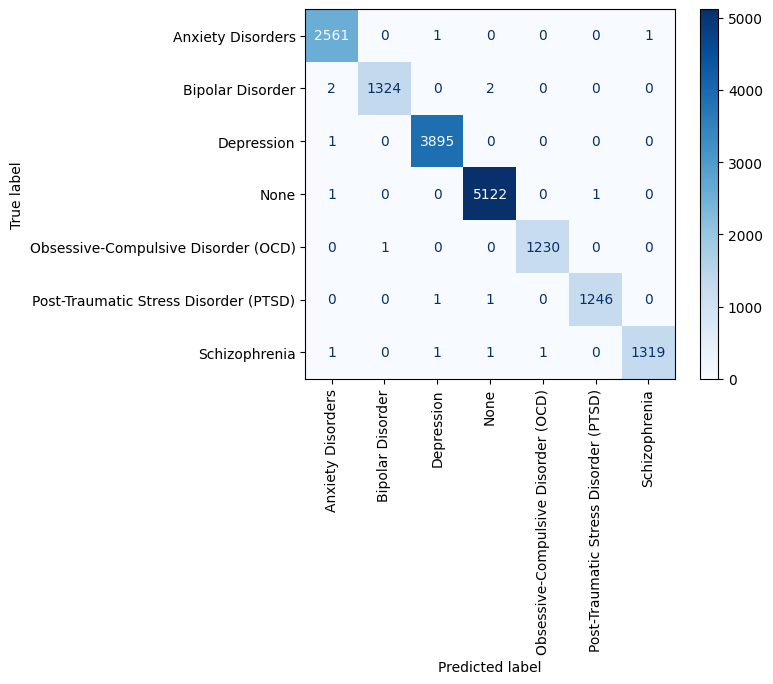

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_results.classes_)
disp.plot(cmap='Blues', values_format='')
plt.xticks(rotation=90)
plt.show()

In [ ]:
joblib.dump(le_results, 'label_encoder_results.joblib')
joblib.dump(model, 'disease_prediction_model.joblib')

['disease_prediction_model.joblib']

In [ ]:
!pip freeze > requirements.txt